## Load Dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../data/supermarket_preprocessed.csv')

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Hour_label,Month,Weekday
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,01 PM,1,Saturday
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,10 AM,3,Friday
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,...,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,01 PM,3,Sunday
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,...,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,08 PM,1,Sunday
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,...,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,10 AM,2,Friday


## Analysis And Visualization

In [ ]:
total_revenue = df['Sales'].sum()
total_gross_income = df['gross income'].sum()
num_transactions = df['Invoice ID'].nunique()
avg_rating = df['Rating'].mean()

In [ ]:
print("Total Revenue:", total_revenue)
print("Total Gross Income:", total_gross_income)
print("Jumlah Transaksi:", num_transactions)
print("Rata-rata Rating:", avg_rating)

$ Total Revenue: 322966.749
$ Total Gross Income: 15379.368999999999
Jumlah Transaksi: 1000
Rata-rata Rating: 6.9727


### Daily Revenue

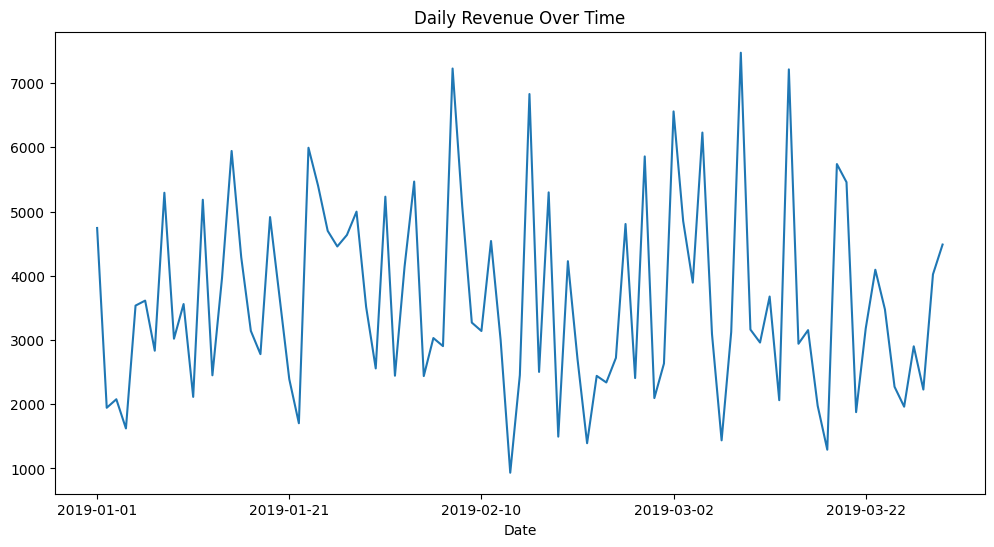

In [16]:
daily_revenue = df.groupby('Date')['Sales'].sum()

daily_revenue.plot(figsize=(12, 6), title='Daily Revenue Over Time')
plt.show()

### Monthly Revenue

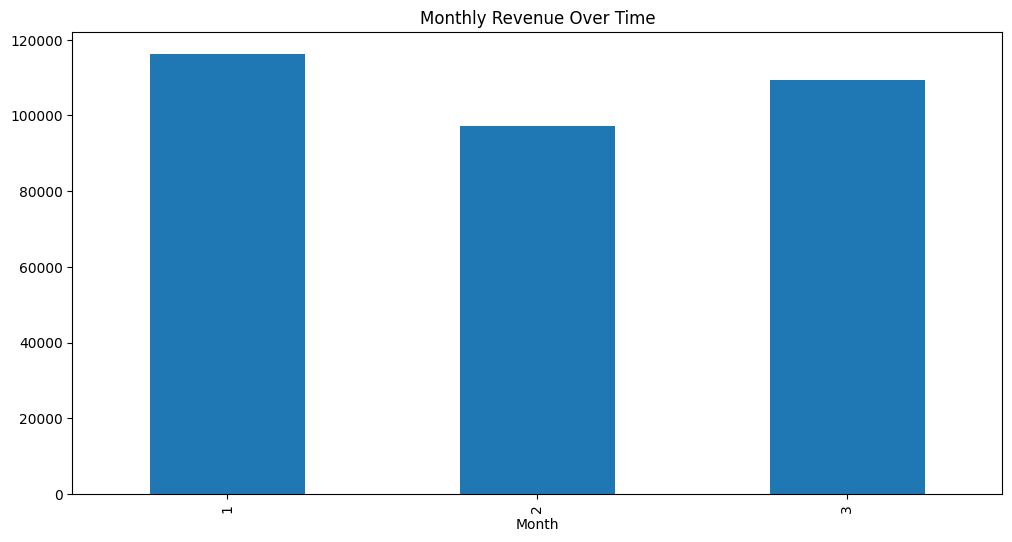

In [17]:
monthly_revenue = df.groupby('Month')['Sales'].sum()

monthly_revenue.plot(kind='bar', figsize=(12, 6), title='Monthly Revenue Over Time')
plt.show()

### Hourly Transaction Count

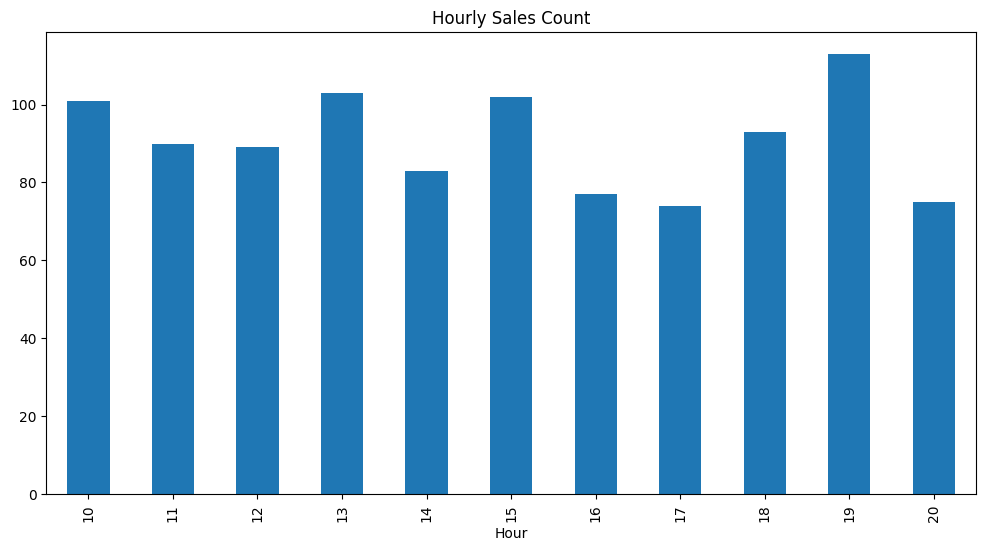

In [18]:
hourly_sales = df.groupby('Hour')['Invoice ID'].count()

hourly_sales.plot(kind='bar', figsize=(12, 6), title='Hourly Sales Count')
plt.show()

### Product Sales

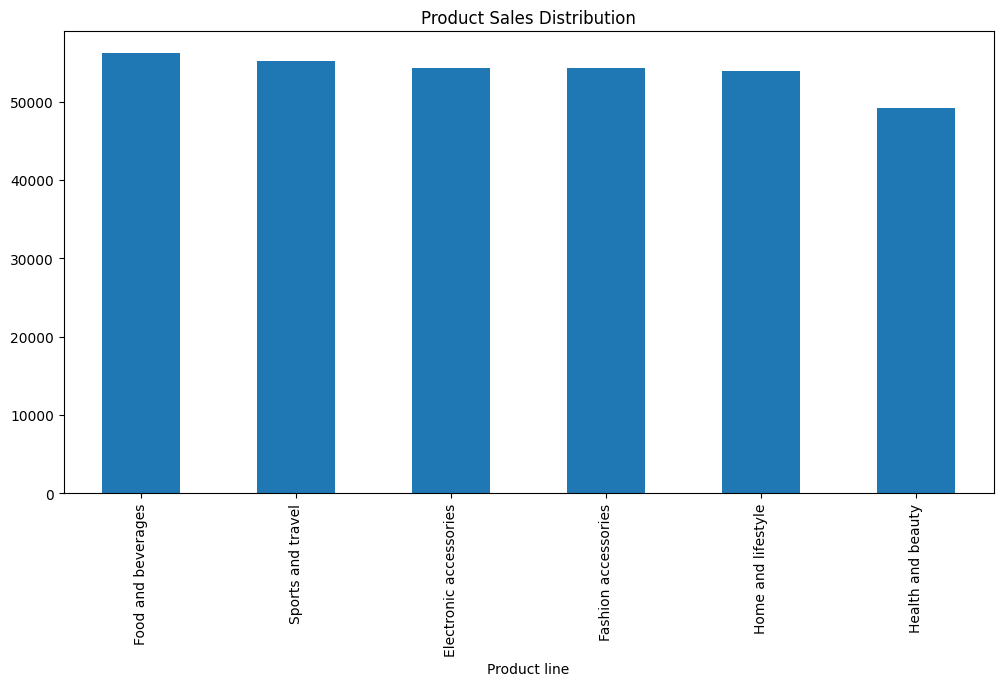

In [19]:
product_sales = df.groupby('Product line')['Sales'].sum().sort_values(ascending=False)

product_sales.plot(kind='bar', figsize=(12, 6), title='Product Sales Distribution')
plt.show()

### Customer Type Analysis

C:\Users\Asus\AppData\Local\Temp\ipykernel_11968\501897368.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer type', y='Sales', data=df, ci=None)


<function matplotlib.pyplot.show(close=None, block=None)>

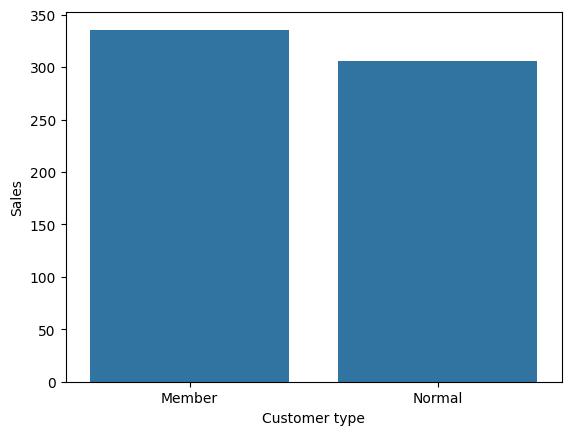

In [21]:
sns.barplot(x='Customer type', y='Sales', data=df, ci=None)
plt.show

### Branch Analysis

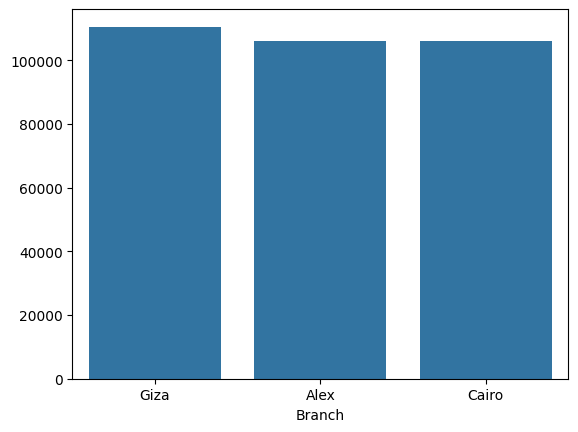

In [25]:
branch_sales = df.groupby('Branch')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=branch_sales.index, y=branch_sales.values)
plt.show()

### Payment Analysis

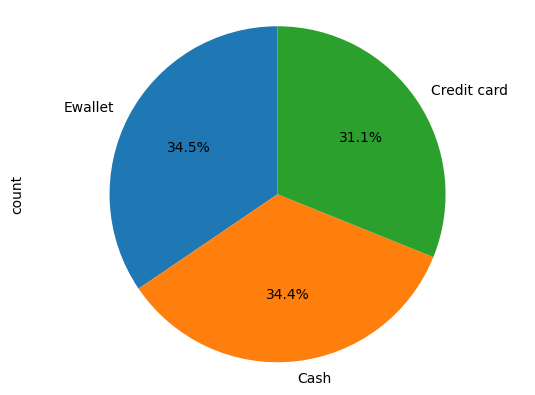

In [26]:
payment_dist = df['Payment'].value_counts()
payment_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()